# 2023년 6월 대여이력 데이터 EDA 

전체 데이터(1년)의 용량이 크기에, 한 번에 다룰 경우 탐색 시간이 오래 걸리기 때문에

비교적 작은 표본 데이터(23년 6월)에서 탐색 및 전처리를 수행해보며 분석 방향을 고안해본다.<br>

### 이상치 탐색 및 제거

대여한 대여소와 반납한 대여소가 동일하고, 대여시간이 극히 짧은 경우 이상치로 판단하여 제거한다.

초기 가설: 이용시간이 2분 이하, 이용거리가 0M인 경우 이상치일 것이다. (이때 다른 이용자에게 영향을 미치지 않을 것이다.)

<b> 분석 후 대안: 이용시간이 1분 이하, 이용거리가 5M 이하인 경우 이상치일 것이다. (이때 다른 이용자에게 영향을 미치지 않을 것이다.) </b>

처음엔 이용시간이 2분 이하, 대여와 반납을 동일한 대여소에서 한 경우 이상치로 간주하려 하였다. (이는 205227 건으로 표본 전체의 4%에 해당한다.) <br>

그러나 대여와 반납을 다른 대여소에 하였음에도 이용시간이 0분인 건은 12498건, 1분 이하인 건은 48330건, 2분 이하인 건은 145143으로<br>

2분이라는 시간이 자전거를 이용하여 대여소 간 이동하기에 충분히 유의미한 시간인 것으로 보여서, 1분 이하로 사용한 경우 이상치로 간주하기로 하였다.<br>

또한 같은 대여소에 반납하여도 몇 미터 정도 이용거리가 측정되는 것을 확인하였기에 5M 이하는 동일한 대여소인 것으로 가정하였다.<br>

<b> 이용시간과 이용거리에 박스플롯 상 유난히 멀리 떨어진 이상점과 극단점이 다수인 것을 확인하였다.</b>

- 이용시간의 경우, 최장 2668분으로(약 44시간) 반납을 잊었거나 기기상의 오류로 반납처리 되지 않은 것으로 예상할 수 있다. 이 경우 다른 사람의 PBSS 이용에 영향을 미치기 때문에 극단점을 그대로 유지하기로 한다.


- 이용거리의 경우, 최장 173379.2M으로(약 173KM). 이밖에도 이용시간과 대조했을 때 현실적으로 설명 불가능한 경우가 다수 발견되었다. (ex. 이용시간은 20초 남짓인데 이용 거리는 3KM로 측정) 전산 상의 오류가 잦은 것으로 예상되지만, 임의로 처리하기 어렵고 해당 데이터를 제거하기엔 거리 외의 정보가 유의미 하기 때문에, 거리와 관련된 분석은 중앙값을 활용한다. 

### 결측치 탐색 및 제거

결측값이 문자열 형식의 \N으로 기재되어 있는 것을 확인하였다.

### 중복값 탐색 및 제거

### 데이터 형변환

불규칙한 대여소 번호를 정수 형식으로 변환

대여일시를 datetime 형식으로 변환

### 필요한 컬럼만 추출 + 새로운 컬럼 추가

### 송파구 데이터만 추출

### 평균 재고량 시각화 방안 고안

# 데이터 및 라이브러리 불러오기

In [135]:
import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
%matplotlib inline

import geopandas as gpd
import folium
import contextily as ctx # 실제 지도 위에 시각화하기 위한 라이브러리
from branca.colormap import linear # 컬러바 추가

import os
import datetime as dt

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# 파일명 출력
file_list = os.listdir()
file_list

['.ipynb_checkpoints',
 'office_data.csv',
 'Office_Data_EDA.ipynb',
 'rentaloffice(2306).csv',
 'Rental_Data_EDA.ipynb',
 '공공자전거 대여소 정보(22.12월 기준).csv',
 '서울특별시 공공자전거 대여이력 정보_2207.csv',
 '서울특별시 공공자전거 대여이력 정보_2208.csv',
 '서울특별시 공공자전거 대여이력 정보_2209.csv',
 '서울특별시 공공자전거 대여이력 정보_2210.csv',
 '서울특별시 공공자전거 대여이력 정보_2211.csv',
 '서울특별시 공공자전거 대여이력 정보_2212.csv',
 '서울특별시 공공자전거 대여이력 정보_2301.csv',
 '서울특별시 공공자전거 대여이력 정보_2302.csv',
 '서울특별시 공공자전거 대여이력 정보_2303.csv',
 '서울특별시 공공자전거 대여이력 정보_2304.csv',
 '서울특별시 공공자전거 대여이력 정보_2305.csv',
 '서울특별시 공공자전거 대여이력 정보_2306.csv',
 '임시.txt',
 '참고논문']

In [3]:
# 시간 오래 걸림
data = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2306.csv", encoding='cp949')

# 데이터 탐색

In [4]:
data.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-57232,2023-06-01 00:00:04,4652,신사두산위브2차아파트 앞,0,2023-06-01 00:00:07,04652,신사두산위브2차아파트 앞,0,0,0.0,1961,\N,내국인,ST-2425,ST-2425
1,SPB-34772,2023-06-01 00:00:09,4162,노량진1동 청소년독서실,0,2023-06-01 00:00:11,04162,노량진1동 청소년독서실,0,0,0.0,1971,M,내국인,ST-2652,ST-2652
2,SPB-56834,2023-06-01 00:00:15,4886,배명고등학교 건너편,0,2023-06-01 00:00:29,04886,배명고등학교 건너편,0,0,0.0,1998,M,내국인,ST-2986,ST-2986
3,SPB-31592,2023-06-01 00:00:24,147,마포역 4번출구 뒤,0,2023-06-01 00:00:41,00147,마포역 4번출구 뒤,0,0,0.0,1996,\N,내국인,ST-205,ST-205
4,SPB-56197,2023-06-01 00:00:33,3517,용마사거리,0,2023-06-01 00:01:01,03517,용마사거리,0,0,0.0,\N,F,내국인,ST-1266,ST-1266


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5085460 entries, 0 to 5085459
Data columns (total 16 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
dtypes: float64(1), int64(3), object(12)
memory usage: 620.8+ MB


In [6]:
# 분석에 사용할 데이터는 결측치가 존재하지 않는다
data.isnull().sum()

자전거번호            0
대여일시             0
대여 대여소번호         0
대여 대여소명          0
대여거치대            0
반납일시             0
반납대여소번호          0
반납대여소명           0
반납거치대            0
이용시간(분)          0
이용거리(M)          0
생년               1
성별          154932
이용자종류            0
대여대여소ID          0
반납대여소ID          0
dtype: int64

In [7]:
data[['이용거리(M)', '이용시간(분)']].describe()

,이용거리(M),이용시간(분)
count,5.085460e+06,5.085460e+06
mean,2.509080e+03,2.112458e+01
std,3.166683e+03,2.820199e+01
min,0.000000e+00,0.000000e+00
25%,8.318900e+02,6.000000e+00
50%,1.490000e+03,1.100000e+01
75%,2.830000e+03,2.600000e+01
max,1.733792e+05,2.668000e+03


# 이상치 탐색

대여한 대여소와 반납한 대여소가 동일하고, 대여시간이 극히 짧은 경우 이상치로 판단하여 제거한다.<br>

초기 가설: 이용시간이 2분 이하, 이용거리가 0M인 경우 이상치일 것이다. (다른 이용자에게 영향을 미치지 않는다.)

In [8]:
data[(data['이용거리(M)'] <= 0) & (data['이용시간(분)'] <= 2)].count() 

자전거번호       205227
대여일시        205227
대여 대여소번호    205227
대여 대여소명     205227
대여거치대       205227
반납일시        205227
반납대여소번호     205227
반납대여소명      205227
반납거치대       205227
이용시간(분)     205227
이용거리(M)     205227
생년          205227
성별          199169
이용자종류       205227
대여대여소ID     205227
반납대여소ID     205227
dtype: int64

In [9]:
data[(data['이용거리(M)'] != 0) & (data['이용시간(분)'] <= 2)].count()

자전거번호       145143
대여일시        145143
대여 대여소번호    145143
대여 대여소명     145143
대여거치대       145143
반납일시        145143
반납대여소번호     145143
반납대여소명      145143
반납거치대       145143
이용시간(분)     145143
이용거리(M)     145143
생년          145143
성별          140722
이용자종류       145143
대여대여소ID     145143
반납대여소ID     145143
dtype: int64

In [10]:
data[(data['이용거리(M)'] == 0) & (data['이용시간(분)'] <= 0)].count()

자전거번호       116406
대여일시        116406
대여 대여소번호    116406
대여 대여소명     116406
대여거치대       116406
반납일시        116406
반납대여소번호     116406
반납대여소명      116406
반납거치대       116406
이용시간(분)     116406
이용거리(M)     116406
생년          116406
성별          113080
이용자종류       116406
대여대여소ID     116406
반납대여소ID     116406
dtype: int64

In [11]:
data[(data['이용거리(M)'] != 0) & (data['이용시간(분)'] <= 0)]

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
158,SPB-33540,2023-06-01 00:09:20,1501,"미아역 3번,4번 출구 사이",0,2023-06-01 00:09:23,01501,"미아역 3번,4번 출구 사이",0,0,0.13,1995,M,내국인,ST-948,ST-948
282,SPB-30712,2023-06-01 00:11:35,1957,구일고등학교 정문,0,2023-06-01 00:12:15,01957,구일고등학교 정문,0,0,141.94,2007,M,내국인,ST-1219,ST-1219
368,SPB-40917,2023-06-01 00:13:30,144,공덕역 8번출구,0,2023-06-01 00:13:56,00144,공덕역 8번출구,0,0,0.20,\N,M,내국인,ST-202,ST-202
447,SPB-62525,2023-06-01 00:14:50,1601,석계역 문화광장 내 자전거 보관소,0,2023-06-01 00:15:45,01601,석계역 문화광장 내 자전거 보관소,0,0,30.00,1999,M,내국인,ST-600,ST-600
567,SPB-59542,2023-06-01 00:16:43,584,광진광장 교통섬,0,2023-06-01 00:17:41,00584,광진광장 교통섬,0,0,10.00,2000,M,내국인,ST-445,ST-445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081826,SPB-32634,2023-06-30 23:45:16,1295,잠실역 8번출구,0,2023-06-30 23:45:28,01295,잠실역 8번출구,0,0,0.20,1994,M,내국인,ST-1584,ST-1584
5082189,SPB-59030,2023-06-30 23:48:28,2219,"고속터미널역 8-1번, 8-2번 출구 사이",0,2023-06-30 23:48:47,02219,"고속터미널역 8-1번, 8-2번 출구 사이",0,0,10.00,1991,M,내국인,ST-750,ST-750
5082932,SPB-47225,2023-06-30 23:54:25,731,서울시 도로환경관리센터,0,2023-06-30 23:55:16,00731,서울시 도로환경관리센터,0,0,10.00,1991,\N,내국인,ST-1002,ST-1002
5083355,SPB-67573,2023-06-30 23:58:26,287,영등포전화국사거리 (서강어린이공원),0,2023-06-30 23:59:07,00287,영등포전화국사거리 (서강어린이공원),0,0,10.00,1989,M,내국인,ST-1653,ST-1653


In [12]:
data[(data['이용거리(M)'] <= 0) & (data['이용시간(분)'] <= 0)].describe()

,대여 대여소번호,대여거치대,이용시간(분),이용거리(M)
count,116406.000000,116406.000000,116406.0,116406.0
mean,2124.554181,11.257693,0.0,0.0
std,1561.926593,31.429038,0.0,0.0
min,102.000000,0.000000,0.0,0.0
25%,785.000000,0.000000,0.0,0.0
50%,1727.000000,0.000000,0.0,0.0
75%,3518.000000,0.000000,0.0,0.0
max,9980.000000,99.000000,0.0,0.0


In [13]:
data[(data['이용거리(M)'] <= 5) & (data['이용거리(M)'] > 0) & (data['이용시간(분)'] <= 0)]

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
158,SPB-33540,2023-06-01 00:09:20,1501,"미아역 3번,4번 출구 사이",0,2023-06-01 00:09:23,01501,"미아역 3번,4번 출구 사이",0,0,0.13,1995,M,내국인,ST-948,ST-948
368,SPB-40917,2023-06-01 00:13:30,144,공덕역 8번출구,0,2023-06-01 00:13:56,00144,공덕역 8번출구,0,0,0.20,\N,M,내국인,ST-202,ST-202
1827,SPB-37765,2023-06-01 00:37:40,1339,삼성전자서비스 성북센터,0,2023-06-01 00:38:01,01339,삼성전자서비스 성북센터,0,0,0.20,1989,M,내국인,ST-1203,ST-1203
7056,SPB-30310,2023-06-01 02:24:16,906,연신내역 5번출구,0,2023-06-01 02:25:05,00906,연신내역 5번출구,0,0,0.13,1979,F,내국인,ST-454,ST-454
7570,SPB-31641,2023-06-01 02:41:25,631,답십리역 1번출구,0,2023-06-01 02:41:35,00631,답십리역 1번출구,0,0,0.10,1980,M,내국인,ST-398,ST-398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073598,SPB-32964,2023-06-30 22:43:44,1018,둔촌 주공 GS 맞은편,0,2023-06-30 22:43:52,01018,둔촌 주공 GS 맞은편,0,0,0.10,1998,\N,내국인,ST-830,ST-830
5074070,SPB-30410,2023-06-30 22:46:43,2540,반포천 앞,0,2023-06-30 22:46:53,02540,반포천 앞,0,0,0.10,1999,\N,내국인,ST-1924,ST-1924
5076075,SPB-30892,2023-06-30 23:00:24,215,여의도고교 앞,0,2023-06-30 23:00:27,00215,여의도고교 앞,0,0,0.10,1999,M,내국인,ST-64,ST-64
5081008,SPB-32016,2023-06-30 23:37:42,825,서빙고동 주민센터 앞,0,2023-06-30 23:38:38,00825,서빙고동 주민센터 앞,0,0,0.20,1991,M,내국인,ST-442,ST-442


In [14]:
data[(data['이용거리(M)'] == 5) & (data['이용거리(M)'] > 0) & (data['이용시간(분)'] <= 0)]

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
354262,SPB-32207,2023-06-02 18:14:45,475,DDP 패션몰,0,2023-06-02 19:15:49,\N,\N,\N,0,5.0,1994,M,내국인,ST-1781,\N


처음엔 이용시간이 2분 이하, 대여와 반납을 동일한 대여소에서 한 경우 이상치로 간주하려 하였다. 이는 205227 건으로 표본 전체의 4%에 해당한다. <br>
그러나 대여와 반납을 다른 대여소에 하였음에도 이용시간이 0분인 건은 12498건, 1분 이하인 건은 48330건, 2분 이하인 건은 145143으로<br>
2분이라는 시간이 자전거를 이용하여 대여소 간 이동하기에 충분히 유의미한 시간인 것으로 보여서<br>
1분 이하로 사용한 경우 이상치로 간주하기로 하였다.<br>
또한 같은 대여소에 반납하여도 몇 미터 정도 이용거리가 측정되는 것을 확인하였기에 5M 이하는 동일한 대여소인 것으로 가정하였다.<br>

위 분석 과정에서 결측값이 \N으로 기재되어 있는 것도 확인하였다.

In [15]:
# 20435 건의 반납 데이터가 결측치인 것으로 보인다.
data[(data['반납대여소번호'] == '\\N')]

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
2491,SPB-82471,2023-06-01 00:32:14,2302,교보타워 버스정류장(신논현역 3번출구 후면),99,2023-06-01 00:48:29,\N,\N,\N,14,1397.0,1961,\N,내국인,ST-787,\N
2704,SPB-58748,2023-06-01 00:23:03,1651,상계동 우방유쉘아파트 앞,0,2023-06-01 00:52:35,\N,\N,\N,7,771.0,2006,F,내국인,ST-1119,\N
3354,SPB-45176,2023-06-01 00:45:27,242,신길선원가와인아파트 앞,0,2023-06-01 01:03:50,\N,\N,\N,10,0.0,1994,\N,내국인,ST-291,\N
3781,SPB-59229,2023-06-01 00:16:27,516,광진메디칼 앞,0,2023-06-01 01:11:42,\N,\N,\N,30,4161.0,1993,M,내국인,ST-114,\N
3787,SPB-49437,2023-06-01 00:00:12,1642,서울여대 남문,0,2023-06-01 01:11:48,\N,\N,\N,7,2938.0,1999,\N,내국인,ST-964,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5085455,SPB-58542,2023-06-30 21:12:21,579,마장역 4번출구,0,2023-07-02 13:05:27,\N,\N,\N,810,0.0,1996,F,내국인,ST-372,\N
5085456,SPB-65875,2023-06-30 21:11:10,4508,유원목동아파트 103동 앞,0,2023-07-02 13:05:57,\N,\N,\N,810,35391.0,2006,F,내국인,ST-2760,\N
5085457,SPB-47327,2023-06-30 23:17:17,2724,(재)FITI시험연구원,0,2023-07-02 13:06:33,\N,\N,\N,810,1580.0,1994,\N,내국인,ST-2041,\N
5085458,SPB-51620,2023-06-30 22:26:14,1602,광운대역 앞,0,2023-07-02 13:07:01,\N,\N,\N,810,2835.0,2006,M,내국인,ST-913,\N


# 데이터 정제
- 특정 컬럼만 추출
- 컬럼 이름 변경
- 결측치 처리
- 중복 데이터 제거
- 데이터 형변환 (날짜, 정수형)

- 이상치 제거

In [16]:
data2 = data[['대여일시', '대여 대여소번호', '대여 대여소명', '반납일시', '반납대여소번호', '반납대여소명', '이용시간(분)', '이용거리(M)']]

In [17]:
data2.rename(columns = {'대여 대여소번호':'대여대여소번호','대여 대여소명':'대여대여소명', '이용시간(분)':'이용시간', '이용거리(M)':'이용거리'}, inplace=True)

C:\Users\lovej\AppData\Local\Temp\ipykernel_27492\468206616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns = {'대여 대여소번호':'대여대여소번호','대여 대여소명':'대여대여소명', '이용시간(분)':'이용시간', '이용거리(M)':'이용거리'}, inplace=True)


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5085460 entries, 0 to 5085459
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일시     object 
 1   대여대여소번호  int64  
 2   대여대여소명   object 
 3   반납일시     object 
 4   반납대여소번호  object 
 5   반납대여소명   object 
 6   이용시간     int64  
 7   이용거리     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 310.4+ MB


### 결측치 제거

In [19]:
data2 = data2.replace('\\N',np.nan)

In [20]:
# 표본 데이터의 0.4%에 해당하는 반납 데이터에 결측치를 보인다. 제거해준다.
data2.isnull().sum()

대여일시           0
대여대여소번호        0
대여대여소명         0
반납일시           0
반납대여소번호    20435
반납대여소명     20435
이용시간           0
이용거리           0
dtype: int64

In [21]:
data2 = data2.dropna(axis=0)

### 중복값 제거

In [22]:
# 중복 데이터 제거
data2.duplicated().sum()

9

In [23]:
data2.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

### 형변환

In [24]:
# 형변환 안 해주면 앞에 0 붙은 형태로 나와서 매칭이 어려움
data2['반납대여소번호'] = data2['반납대여소번호'].astype(np.int64)

In [25]:
# datetime으로 형변환시 이상치 발견. 년도가 2323년이라 오류 발생 
# data2['대여일시'] = pd.to_datetime(data2['대여일시'])

In [26]:
data2[data2['대여일시'].str.contains('2323')]

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
4134434,2323-06-23 21:27:01,1448,코스트코 상봉점,2023-06-23 22:13:43,4024,꿈의숲 SK뷰 아파트,44,10050.26


In [27]:
# 단순히 잘못 기재된 데이터로 간주하여 연도만 수정
data2.loc[4134434, '대여일시'] = '2023-06-23 21:27:01'

In [28]:
data2['대여일시'] = pd.to_datetime(data2['대여일시'])

In [29]:
data2['반납일시'] = pd.to_datetime(data2['반납일시'])

In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065016 entries, 0 to 5065015
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일시     datetime64[ns]
 1   대여대여소번호  int64         
 2   대여대여소명   object        
 3   반납일시     datetime64[ns]
 4   반납대여소번호  int64         
 5   반납대여소명   object        
 6   이용시간     int64         
 7   이용거리     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 309.1+ MB


### 이상치 제거

이용시간과 이용거리에 박스플롯 상 유난히 멀리 떨어진 이상점과 극단점이 다수인 것을 확인하였다.

- 이용시간의 경우, 최장 2668분으로(약 44시간) 반납을 잊었거나 기기상의 오류로 반납처리 되지 않은 것으로 예상할 수 있다. 이 경우 다른 사람의 PBSS 이용에 영향을 미치기 때문에 극단점을 그대로 유지하기로 한다.


- 이용거리의 경우, 최장 173379.2M으로(약 173KM). 이밖에도 이용시간과 대조했을 때 현실적으로 설명 불가능한 경우가 다수 발견되었다. (ex. 이용시간은 20초 남짓인데 이용 거리는 3KM로 측정) 전산 상의 오류가 잦은 것으로 예상되지만, 임의로 처리하기 어렵고 해당 데이터를 제거하기엔 거리 외의 정보가 유의미 하기 때문에, 거리와 관련된 분석은 중앙값을 활용한다. 

In [31]:
data2[(data2['이용시간'] <= 2) & (data2['대여대여소번호']==data2['반납대여소번호'])].describe()

,대여대여소번호,반납대여소번호,이용시간,이용거리
count,158820.000000,158820.000000,158820.000000,158820.000000
mean,2103.972195,2103.972195,0.264847,11.098083
std,1543.809221,1543.809221,0.552467,192.759430
min,102.000000,102.000000,0.000000,0.000000
25%,771.000000,771.000000,0.000000,0.000000
50%,1720.000000,1720.000000,0.000000,0.000000
75%,3514.000000,3514.000000,0.000000,0.000000
max,9980.000000,9980.000000,2.000000,29490.000000


In [32]:
data2[(data2['이용시간'] <= 1) & (data2['대여대여소번호']==data2['반납대여소번호'])].describe()

,대여대여소번호,반납대여소번호,이용시간,이용거리
count,150044.000000,150044.000000,150044.000000,150044.000000
mean,2105.843553,2105.843553,0.163359,9.024207
std,1544.582496,1544.582496,0.369694,196.408697
min,102.000000,102.000000,0.000000,0.000000
25%,773.000000,773.000000,0.000000,0.000000
50%,1720.000000,1720.000000,0.000000,0.000000
75%,3514.000000,3514.000000,0.000000,0.000000
max,9980.000000,9980.000000,1.000000,29490.000000


In [33]:
data2[(data2['이용시간'] <= 1) & (data2['대여대여소번호']==data2['반납대여소번호']) & (data2['이용거리'] > 20000)]

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
654898,2023-06-04 15:39:46,1866,서울안천초등학교 옆,2023-06-04 15:40:18,1866,서울안천초등학교 옆,0,29490.0
1672651,2023-06-09 22:15:13,2183,동방1교,2023-06-09 22:15:33,2183,동방1교,0,24170.0
1904993,2023-06-11 17:25:00,4484,잠실나루역4번출구뒤,2023-06-11 17:25:10,4484,잠실나루역4번출구뒤,0,25881.0
3068910,2023-06-17 17:29:34,205,산업은행 앞,2023-06-17 17:30:03,205,산업은행 앞,0,21290.0


In [34]:
drop_index = data2[(data2['이용시간'] <= 1) & (data2['대여대여소번호']==data2['반납대여소번호'])].index

In [35]:
data2.tail()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
5065011,2023-06-30 23:43:06,5851,도림천 건널목 위,2023-07-01 15:07:42,1961,신도림테크노근린공원,925,1980.02
5065012,2023-06-30 16:14:15,4708,조계사앞사거리,2023-07-01 16:46:13,308,광화문 S타워 앞,1471,0.00
5065013,2023-06-30 18:03:41,2080,대방지하보도(대방동경남아너스빌아파트),2023-07-01 18:15:32,2080,대방지하보도(대방동경남아너스빌아파트),1451,0.00
5065014,2023-06-30 23:14:21,336,충무로역 6번출구 앞,2023-07-01 23:16:05,3415,동대문역6번출구,1441,2180.00
5065015,2023-06-30 22:28:11,708,서울출입국관리사무소 앞,2023-07-02 08:07:13,1974,신도림2차e편한세상아파트 203동 앞,2019,45960.00


In [36]:
data3 = data2.drop(drop_index, axis=0).reset_index(drop=True)

In [37]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914972 entries, 0 to 4914971
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일시     datetime64[ns]
 1   대여대여소번호  int64         
 2   대여대여소명   object        
 3   반납일시     datetime64[ns]
 4   반납대여소번호  int64         
 5   반납대여소명   object        
 6   이용시간     int64         
 7   이용거리     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 300.0+ MB


### 새로운 열 추가

In [38]:
data3['월'] = data3['대여일시'].dt.month

In [39]:
data3['시간대'] = data3['대여일시'].dt.hour

In [40]:
# 월요일 = 0 ~ 일요일 =  6
data3['요일'] = data3['대여일시'].dt.weekday

In [41]:
data3.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,월,시간대,요일
0,2023-06-01 00:00:11,1001,광진교 남단 사거리(천호공원 방면),2023-06-01 00:02:22,1002,해공공원(천호동),2,350.42,6,0,3
1,2023-06-01 00:00:12,2331,동영문화센터앞,2023-06-01 00:02:36,2357,르네상스호텔사거리 역삼지하보도 3번출구 앞 (더 오번 빌딩 명동칼국수 앞),2,0.00,6,0,3
2,2023-06-01 00:00:15,4362,행당중학교 후문,2023-06-01 00:03:05,4362,행당중학교 후문,2,0.00,6,0,3
3,2023-06-01 00:00:25,530,청계벽산아파트 앞,2023-06-01 00:03:10,550,서울시설공단 앞,2,0.00,6,0,3
4,2023-06-01 00:00:57,475,DDP 패션몰,2023-06-01 00:03:14,4765,동대문디자인플라자,2,210.00,6,0,3


In [42]:
data3.describe()

,대여대여소번호,반납대여소번호,이용시간,이용거리,월,시간대,요일
count,4.914972e+06,4.914972e+06,4.914972e+06,4.914972e+06,4914972.0,4.914972e+06,4.914972e+06
mean,2.145703e+03,2.150473e+03,2.165342e+01,2.584397e+03,6.0,1.434161e+01,2.989753e+00
std,1.539014e+03,1.548192e+03,2.747433e+01,3.178766e+03,0.0,5.824813e+00,1.889588e+00
min,1.020000e+02,3.000000e+00,0.000000e+00,0.000000e+00,6.0,0.000000e+00,0.000000e+00
25%,8.090000e+02,8.180000e+02,6.000000e+00,8.800000e+02,6.0,1.000000e+01,1.000000e+00
50%,1.735000e+03,1.735000e+03,1.200000e+01,1.540000e+03,6.0,1.600000e+01,3.000000e+00
75%,3.542000e+03,3.545000e+03,2.600000e+01,2.900000e+03,6.0,1.900000e+01,4.000000e+00
max,9.980000e+03,9.999900e+04,2.668000e+03,1.733792e+05,6.0,2.300000e+01,6.000000e+00


<AxesSubplot: title={'center': '2023년 6월 PBSS 이용자 이용거리(M) 분포'}, xlabel='이용거리'>

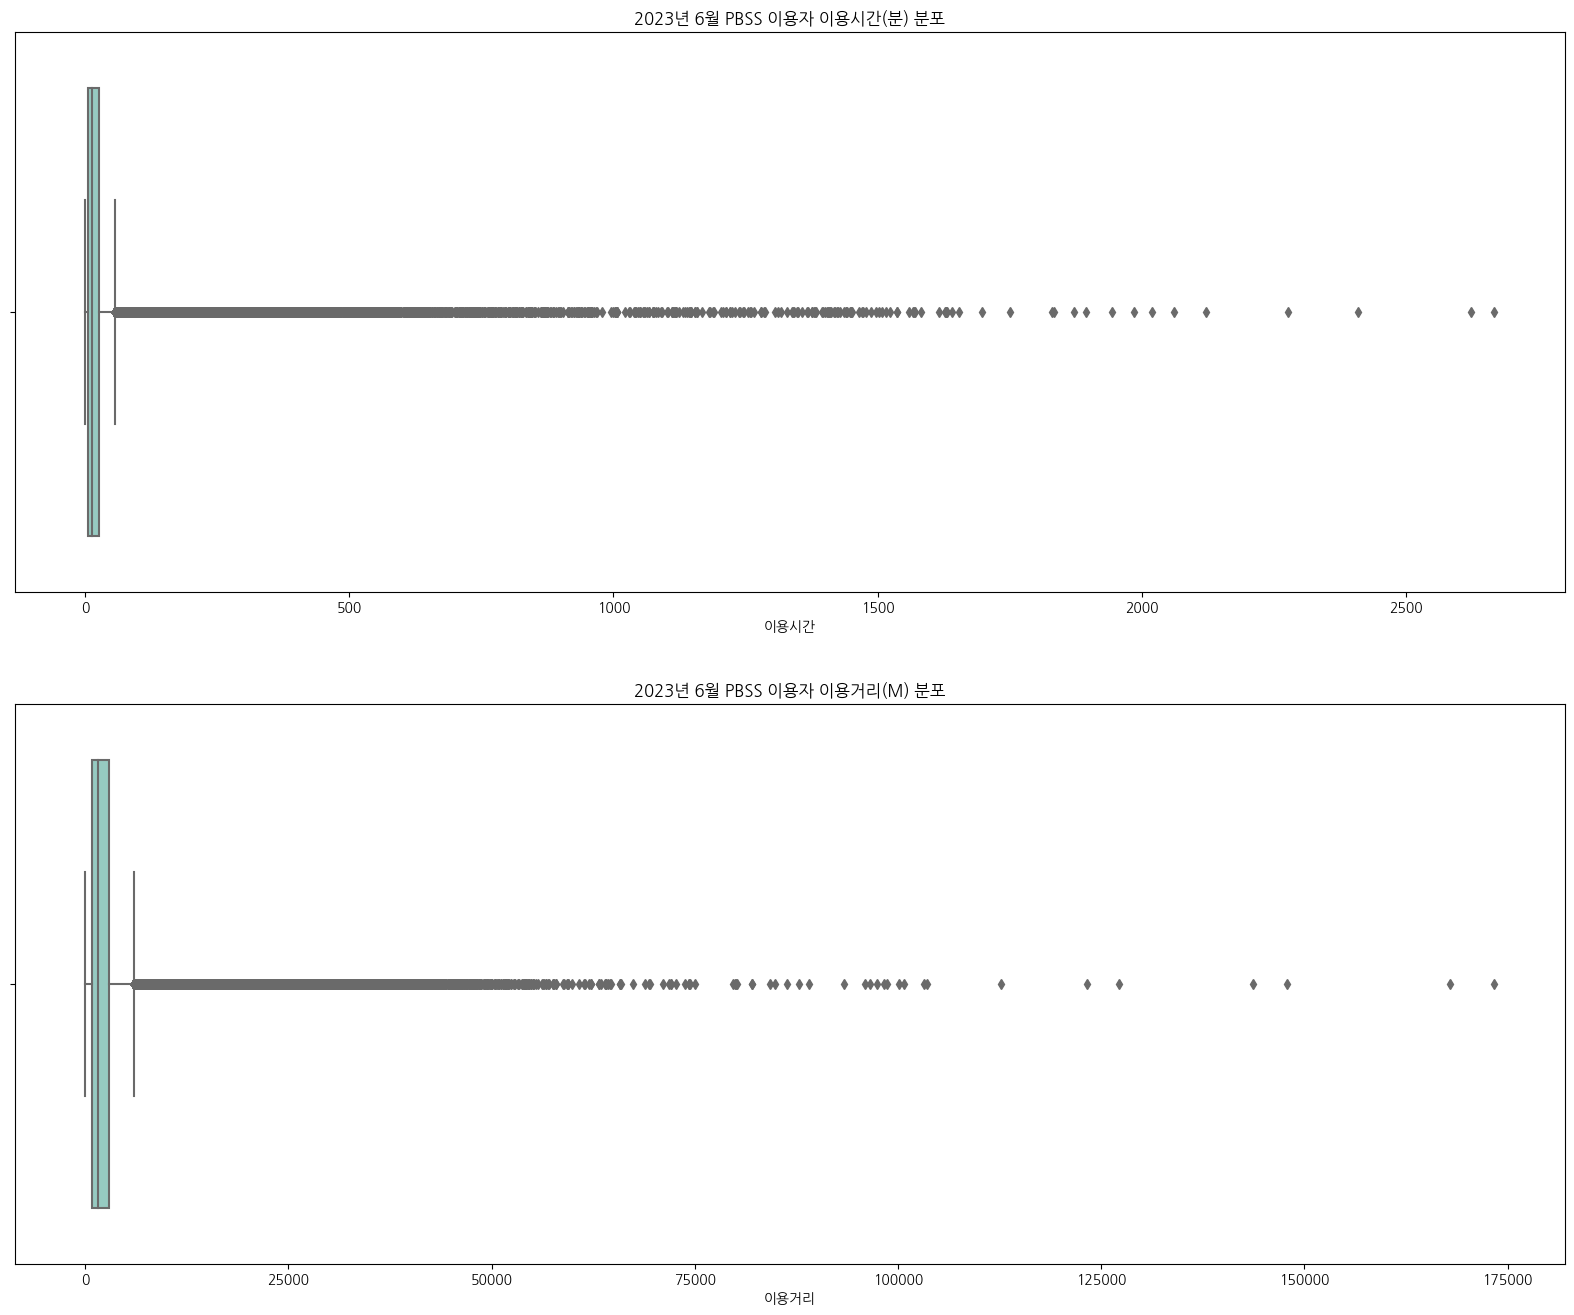

In [43]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 1, 1)
plt.title('2023년 6월 PBSS 이용자 이용시간(분) 분포')
sns.boxplot(x=data3["이용시간"], palette = "Set3")

plt.subplot(2, 1, 2)
plt.title('2023년 6월 PBSS 이용자 이용거리(M) 분포')
sns.boxplot(x=data3["이용거리"], palette = "Set3")

In [44]:
data3.sort_values('이용거리', ascending=False)

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,월,시간대,요일
3020952,2023-06-17 20:37:03,2263,바우뫼문화복지회관,2023-06-17 21:18:03,3609,언주초등학교 입구,41,173379.23,6,20,5
4280805,2023-06-25 20:53:29,2262,한신16차아파트 119동 앞,2023-06-25 21:26:27,2262,한신16차아파트 119동 앞,32,167897.26,6,20,6
3945115,2023-06-23 18:31:37,258,신길역3번출구,2023-06-23 18:36:38,4592,신길우성4차아파트,5,147812.47,6,18,4
2367343,2023-06-14 12:03:59,1867,대륭포스트타워6차 앞,2023-06-14 12:22:17,1867,대륭포스트타워6차 앞,18,143690.02,6,12,2
3984742,2023-06-23 21:09:43,2623,석촌동 주민센터,2023-06-23 21:24:28,2613,잠실나들목,14,127130.07,6,21,4
...,...,...,...,...,...,...,...,...,...,...,...
2408522,2023-06-14 18:04:42,4559,신길역 2번출구,2023-06-14 18:07:20,4559,신길역 2번출구,2,0.00,6,18,2
4379240,2023-06-27 08:08:50,917,녹번역 3번출구,2023-06-27 08:10:56,4674,녹번역e편한세상 캐슬 정문 앞,2,0.00,6,8,1
3207596,2023-06-19 07:20:45,1908,해원리바파크 육교 밑,2023-06-19 07:23:35,1957,구일고등학교 정문,2,0.00,6,7,0
984914,2023-06-06 14:47:02,4909,노보텔 앰배서더 앞,2023-06-06 14:48:46,2421,신논현역 4번출구,1,0.00,6,14,1


In [45]:
data3.sort_values('이용시간', ascending=False)

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,월,시간대,요일
918251,2023-06-05 17:12:19,1952,천왕연지타운2단지 앞,2023-06-07 13:40:44,1952,천왕연지타운2단지 앞,2668,2577.92,6,17,0
918252,2023-06-05 22:02:26,3614,은마아파트 입구 사거리,2023-06-07 17:47:12,3614,은마아파트 입구 사거리,2624,30.00,6,22,0
3190391,2023-06-18 18:40:30,1906,신도림역 1번 출구 앞,2023-06-20 10:51:07,3907,신도림7차e편한세상아파트 806동 앞,2410,24830.74,6,18,6
198401,2023-06-01 20:45:02,3873,동서울우편집중국 앞,2023-06-03 10:43:42,2613,잠실나들목,2278,4000.00,6,20,3
1783022,2023-06-10 20:57:22,233,양평1동 YP센터 앞,2023-06-12 08:18:45,4561,양평역 1번출구,2121,0.00,6,20,5
...,...,...,...,...,...,...,...,...,...,...,...
1693484,2023-06-10 12:42:18,1558,강북문화정보도서관,2023-06-10 12:43:15,1571,북서울 꿈의 숲 입구,0,170.00,6,12,5
2575378,2023-06-15 15:17:49,2645,잠실나들목2(엘스아파트136동),2023-06-15 15:18:00,4483,잠실나들목4,0,0.00,6,15,3
4148434,2023-06-24 21:55:52,2183,동방1교,2023-06-24 21:56:36,3819,서울대벤처타운역,0,0.00,6,21,5
1693443,2023-06-10 12:42:07,2171,서울대입구역 5번출구,2023-06-10 12:42:54,2116,에이스에이존빌딩,0,208.59,6,12,5


# 송파구 데이터만 추출

In [46]:
office = pd.read_csv("rentaloffice(2306).csv", encoding='cp949')

In [47]:
office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2749 non-null   int64  
 1   대여소명    2749 non-null   object 
 2   자치구     2749 non-null   object 
 3   상세주소    2749 non-null   object 
 4   위도      2749 non-null   float64
 5   경도      2749 non-null   float64
 6   설치시기    2749 non-null   object 
 7   LCD     1315 non-null   float64
 8   QR      1582 non-null   float64
 9   운영방식    2749 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 214.9+ KB


In [48]:
office.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,11.0,11.0,QR


In [49]:
# 송파구 내 대여소 번호만 저장
songpa_office_list = []

for i in range(len(office)):
    if office.iloc[i]['자치구'] == '송파구':
        songpa_office_list.append(office.iloc[i]['대여소번호'])

print(songpa_office_list)

[1201, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1212, 1213, 1214, 1215, 1217, 1218, 1220, 1221, 1222, 1224, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1235, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1250, 1251, 1253, 1256, 1257, 1258, 1259, 1260, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1271, 1274, 1275, 1277, 1278, 1279, 1280, 1282, 1283, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1293, 1295, 1296, 1297, 1299, 1300, 2601, 2603, 2604, 2605, 2606, 2608, 2609, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2625, 2626, 2627, 2628, 2630, 2631, 2632, 2633, 2634, 2635, 2637, 2639, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 4458, 4460, 4461, 4462, 4463, 4464, 4465, 4467, 4468, 4860, 4469, 4472, 4473, 4474, 4475, 4478, 4479, 4480, 4481, 4483, 4452, 4484, 4485, 4486, 4488, 4490, 4491, 4493, 4496, 4497, 4499, 4500, 4852, 4854, 4855, 4856, 4857, 4453, 4454, 445

In [50]:
# 2023년 6월 기준 송파구엔 218개의 대여소 존재, 전체 대여소의 약 8%에 해당한다.
print(len(office),  len(songpa_office_list))

2749 218


In [51]:
office[office['자치구']=='송파구']

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식
2409,1201,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,2017-06-22,15.0,NaN,LCD
2410,1203,밀리아나2빌딩 앞,송파구,서울특별시 송파구 송파대로28길 24,37.493729,127.120621,2017-05-26,20.0,NaN,LCD
2411,1204,거여역 3번출구,송파구,서울특별시 송파구 오금로 지하 499,37.493343,127.144730,2017-06-28,10.0,NaN,LCD
2412,1205,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,2017-04-24,15.0,NaN,LCD
2413,1206,9호선종합운동장역 9번출구,송파구,서울특별시 송파구 올림픽로 지하 23,37.511280,127.078239,2017-04-24,20.0,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2622,5768,방이삼거리,송파구,송파구 방이동 66-3,37.512291,127.108254,2023-02-10,NaN,12.0,QR
2623,5770,남위례1,송파구,송파구 장지동 917-12,37.475052,127.133041,2023-04-25,NaN,10.0,QR
2624,5772,마천사거리3,송파구,송파구 마천동 118-24,37.498371,127.146957,2023-05-03,NaN,5.0,QR
2625,5773,송파시그니처롯데캐슬,송파구,송파구 거여동 695,37.497143,127.146416,2023-05-03,NaN,7.0,QR


In [52]:
data_s = data3[(data3['대여대여소번호'].isin(songpa_office_list)) | (data3['반납대여소번호'].isin(songpa_office_list))]
data_s

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,월,시간대,요일
7,2023-06-01 00:00:10,2632,석촌고분역 2번 출구,2023-06-01 00:03:37,2601,석촌호수 아뜰리에,3,553.24,6,0,3
26,2023-06-01 00:02:39,1248,방이초등학교,2023-06-01 00:05:47,1268,몽촌토성역 1번출구 옆,3,730.00,6,0,3
137,2023-06-01 00:05:54,1212,송파역 2번 출구앞,2023-06-01 00:09:41,4867,가락대림아파트 앞,3,570.00,6,0,3
139,2023-06-01 00:00:53,4864,송파사거리,2023-06-01 00:09:48,1262,송파여성문화회관 앞,8,1260.00,6,0,3
140,2023-06-01 00:02:50,1209,잠실나루역 (2번 출구 쪽),2023-06-01 00:09:49,5768,방이삼거리,6,960.00,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...
4914915,2023-06-30 23:56:52,3683,KT&G강동지사,2023-07-01 01:45:17,4452,삼성SDS,108,8371.02,6,23,4
4914917,2023-06-30 23:50:55,4859,잠실나루 나들목,2023-07-01 01:48:19,4092,도봉경찰서 교차로,117,22830.00,6,23,4
4914946,2023-06-30 21:10:54,4897,잠실주공5단지1,2023-07-01 04:27:23,2623,석촌동 주민센터,436,10101.84,6,21,4
4914965,2023-06-30 21:50:36,2646,레이크펠리스101동앞,2023-07-01 13:30:02,3550,금호나들목,939,16506.13,6,21,4


In [53]:
data_s.reset_index(drop=True, inplace=True)
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510138 entries, 0 to 510137
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   대여일시     510138 non-null  datetime64[ns]
 1   대여대여소번호  510138 non-null  int64         
 2   대여대여소명   510138 non-null  object        
 3   반납일시     510138 non-null  datetime64[ns]
 4   반납대여소번호  510138 non-null  int64         
 5   반납대여소명   510138 non-null  object        
 6   이용시간     510138 non-null  int64         
 7   이용거리     510138 non-null  float64       
 8   월        510138 non-null  int64         
 9   시간대      510138 non-null  int64         
 10  요일       510138 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 42.8+ MB


<AxesSubplot: title={'center': '2023년 6월 PBSS 이용자 이용거리(M) 분포'}, xlabel='이용거리'>

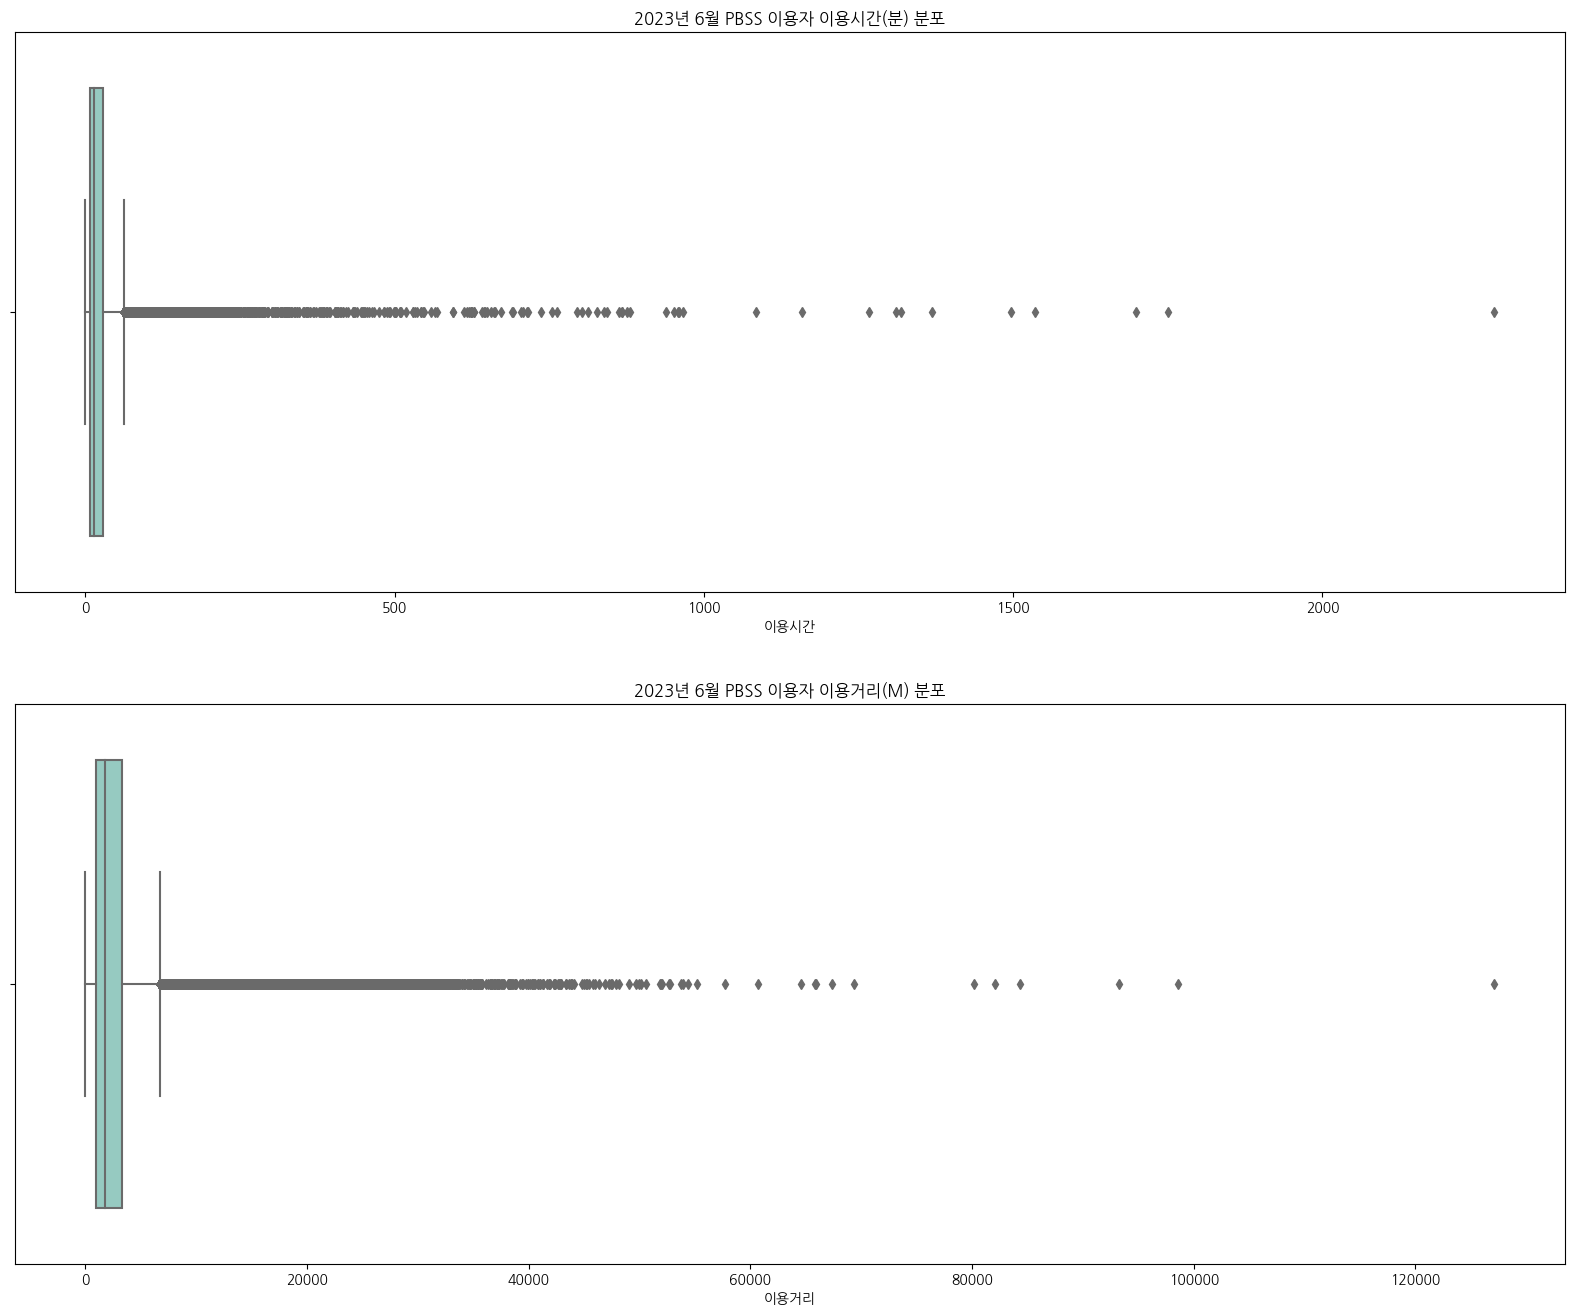

In [54]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 1, 1)
plt.title('2023년 6월 PBSS 이용자 이용시간(분) 분포')
sns.boxplot(x=data_s["이용시간"], palette = "Set3")

plt.subplot(2, 1, 2)
plt.title('2023년 6월 PBSS 이용자 이용거리(M) 분포')
sns.boxplot(x=data_s["이용거리"], palette = "Set3")

In [55]:
data_s.head()  

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,월,시간대,요일
0,2023-06-01 00:00:10,2632,석촌고분역 2번 출구,2023-06-01 00:03:37,2601,석촌호수 아뜰리에,3,553.24,6,0,3
1,2023-06-01 00:02:39,1248,방이초등학교,2023-06-01 00:05:47,1268,몽촌토성역 1번출구 옆,3,730.00,6,0,3
2,2023-06-01 00:05:54,1212,송파역 2번 출구앞,2023-06-01 00:09:41,4867,가락대림아파트 앞,3,570.00,6,0,3
3,2023-06-01 00:00:53,4864,송파사거리,2023-06-01 00:09:48,1262,송파여성문화회관 앞,8,1260.00,6,0,3
4,2023-06-01 00:02:50,1209,잠실나루역 (2번 출구 쪽),2023-06-01 00:09:49,5768,방이삼거리,6,960.00,6,0,3


# 송파구 내 대여소 별 단위시간 당 평균 대여량 / 반납량 구하기

단위 시간은 15분으로 설정

구한 단위 시간당 평균 대여량 / 반납량을 바탕으로 대여소 별 평균 자전거 수, 평균 자전거 거치 시간을 구한다.

In [56]:
# 단위시간 당 평균 자전거 대여/반납 수를 구하기 위해, 단위시간 별로 그룹핑하는 컬럼 생성

data_s['대여일시(단위시간)'] = data_s['대여일시'].dt.floor('15T').dt.strftime('%Y-%m-%d %H:%M:%S')
data_s['반납일시(단위시간)'] = data_s['반납일시'].dt.floor('15T').dt.strftime('%Y-%m-%d %H:%M:%S')

C:\Users\lovej\AppData\Local\Temp\ipykernel_27492\4121556993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s['대여일시(단위시간)'] = data_s['대여일시'].dt.floor('15T').dt.strftime('%Y-%m-%d %H:%M:%S')
C:\Users\lovej\AppData\Local\Temp\ipykernel_27492\4121556993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s['반납일시(단위시간)'] = data_s['반납일시'].dt.floor('15T').dt.strftime('%Y-%m-%d %H:%M:%S')


In [57]:
return_grouping_per_15 = data_s.groupby(['반납대여소번호', '반납일시(단위시간)']).size().reset_index(name='반납량')
rent_grouping_per_15 = data_s.groupby(['대여대여소번호', '대여일시(단위시간)']).size().reset_index(name='대여량')

rent_grouping_per_15

,대여대여소번호,대여일시(단위시간),대여량
0,102,2023-06-01 17:45:00,1
1,103,2023-06-05 17:30:00,1
2,104,2023-06-04 15:00:00,1
3,104,2023-06-27 15:45:00,1
4,106,2023-06-06 10:15:00,1
...,...,...,...
274612,5862,2023-06-22 20:15:00,1
274613,5862,2023-06-28 12:30:00,1
274614,5862,2023-06-30 20:15:00,2
274615,5865,2023-06-03 15:45:00,1


In [58]:
avg_return_per_15 = return_grouping_per_15.groupby('반납대여소번호')['반납량'].mean().reset_index(name='평균반납량(15분)')
avg_rent_per_15 = rent_grouping_per_15.groupby('대여대여소번호')['대여량'].mean().reset_index(name='평균대여량(15분)')

In [59]:
avg_rent_per_15.sort_values(by='평균대여량(15분)', ascending=False).head(10)

,대여대여소번호,평균대여량(15분)
437,1210,6.116726
865,2608,4.447954
878,2622,4.439049
1292,4870,3.507757
876,2620,3.489170
1361,5768,3.481604
500,1295,3.321348
1182,4457,3.255268
446,1222,3.171313
643,2201,3.000000


In [60]:
#songpa_inventory = office[['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도']]

songpa_info = office[office['자치구']=='송파구']
songpa_info

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식
2409,1201,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,2017-06-22,15.0,NaN,LCD
2410,1203,밀리아나2빌딩 앞,송파구,서울특별시 송파구 송파대로28길 24,37.493729,127.120621,2017-05-26,20.0,NaN,LCD
2411,1204,거여역 3번출구,송파구,서울특별시 송파구 오금로 지하 499,37.493343,127.144730,2017-06-28,10.0,NaN,LCD
2412,1205,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,2017-04-24,15.0,NaN,LCD
2413,1206,9호선종합운동장역 9번출구,송파구,서울특별시 송파구 올림픽로 지하 23,37.511280,127.078239,2017-04-24,20.0,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2622,5768,방이삼거리,송파구,송파구 방이동 66-3,37.512291,127.108254,2023-02-10,NaN,12.0,QR
2623,5770,남위례1,송파구,송파구 장지동 917-12,37.475052,127.133041,2023-04-25,NaN,10.0,QR
2624,5772,마천사거리3,송파구,송파구 마천동 118-24,37.498371,127.146957,2023-05-03,NaN,5.0,QR
2625,5773,송파시그니처롯데캐슬,송파구,송파구 거여동 695,37.497143,127.146416,2023-05-03,NaN,7.0,QR


In [61]:
songpa_inventory_0 = pd.merge(songpa_info, avg_return_per_15, how='left', left_on='대여소번호', right_on='반납대여소번호')
songpa_inventory = pd.merge(songpa_inventory_0, avg_rent_per_15, how='left', left_on='대여소번호', right_on='대여대여소번호')
songpa_inventory

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식,반납대여소번호,평균반납량(15분),대여대여소번호,평균대여량(15분)
0,1201,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,2017-06-22,15.0,NaN,LCD,1201.0,1.966228,1201.0,1.961538
1,1203,밀리아나2빌딩 앞,송파구,서울특별시 송파구 송파대로28길 24,37.493729,127.120621,2017-05-26,20.0,NaN,LCD,1203.0,1.656847,1203.0,1.740803
2,1204,거여역 3번출구,송파구,서울특별시 송파구 오금로 지하 499,37.493343,127.144730,2017-06-28,10.0,NaN,LCD,1204.0,1.694481,1204.0,1.755616
3,1205,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,2017-04-24,15.0,NaN,LCD,1205.0,2.157744,1205.0,2.308200
4,1206,9호선종합운동장역 9번출구,송파구,서울특별시 송파구 올림픽로 지하 23,37.511280,127.078239,2017-04-24,20.0,NaN,LCD,1206.0,1.634167,1206.0,1.724076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,5768,방이삼거리,송파구,송파구 방이동 66-3,37.512291,127.108254,2023-02-10,NaN,12.0,QR,5768.0,3.497265,5768.0,3.481604
214,5770,남위례1,송파구,송파구 장지동 917-12,37.475052,127.133041,2023-04-25,NaN,10.0,QR,5770.0,1.295060,5770.0,1.351506
215,5772,마천사거리3,송파구,송파구 마천동 118-24,37.498371,127.146957,2023-05-03,NaN,5.0,QR,5772.0,1.144809,5772.0,1.128686
216,5773,송파시그니처롯데캐슬,송파구,송파구 거여동 695,37.497143,127.146416,2023-05-03,NaN,7.0,QR,5773.0,1.075221,5773.0,1.100962


In [62]:
songpa_inventory.drop(['설치시기', 'LCD', 'QR', '운영방식', '반납대여소번호', '대여대여소번호'], axis=1, inplace=True)

In [63]:
#하나의 결측치가 존재한다.
songpa_inventory.isnull().sum()

대여소번호         0
대여소명          0
자치구           0
상세주소          0
위도            0
경도            0
평균반납량(15분)    1
평균대여량(15분)    1
dtype: int64

In [64]:
# 직접 조회해보니 2023년엔 없어진 대여소이다. 제거해준다.
print(songpa_inventory.loc[songpa_inventory['평균반납량(15분)'].isnull()])
songpa_inventory.dropna(inplace=True)

     대여소번호    대여소명  자치구     상세주소         위도          경도  평균반납량(15분)  \
158   4500   풍납나들목  송파구  풍납동 425  37.528652  127.108666         NaN   

     평균대여량(15분)  
158         NaN  


In [68]:
songpa_inventory['평균재고량(15분)'] = songpa_inventory['평균반납량(15분)'] - songpa_inventory['평균대여량(15분)']

#songpa_inventory['평균자전거거치시간'] = songpa_inventory['평균자전거재고량'] / songpa_inventory['평균반납량(15분)']

In [70]:
songpa_inventory.drop(labels=['평균자전거재고량', '평균자전거거치시간'], axis=1, inplace=True)

In [71]:
songpa_inventory  

,대여소번호,대여소명,자치구,상세주소,위도,경도,평균반납량(15분),평균대여량(15분),평균재고량(15분)
0,1201,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,1.966228,1.961538,0.004689
1,1203,밀리아나2빌딩 앞,송파구,서울특별시 송파구 송파대로28길 24,37.493729,127.120621,1.656847,1.740803,-0.083956
2,1204,거여역 3번출구,송파구,서울특별시 송파구 오금로 지하 499,37.493343,127.144730,1.694481,1.755616,-0.061135
3,1205,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,2.157744,2.308200,-0.150456
4,1206,9호선종합운동장역 9번출구,송파구,서울특별시 송파구 올림픽로 지하 23,37.511280,127.078239,1.634167,1.724076,-0.089908
...,...,...,...,...,...,...,...,...,...
213,5768,방이삼거리,송파구,송파구 방이동 66-3,37.512291,127.108254,3.497265,3.481604,0.015661
214,5770,남위례1,송파구,송파구 장지동 917-12,37.475052,127.133041,1.295060,1.351506,-0.056446
215,5772,마천사거리3,송파구,송파구 마천동 118-24,37.498371,127.146957,1.144809,1.128686,0.016122
216,5773,송파시그니처롯데캐슬,송파구,송파구 거여동 695,37.497143,127.146416,1.075221,1.100962,-0.025740


In [72]:
songpa_inventory.sort_values(by='평균재고량(15분)', ascending=False)

,대여소번호,대여소명,자치구,상세주소,위도,경도,평균반납량(15분),평균대여량(15분),평균재고량(15분)
196,4893,문정법조단지12,송파구,송파구 문정동 500-1,37.486393,127.114838,2.904561,2.307692,0.596869
82,2609,보성중고등학교 후문 앞,송파구,송파구 양재대로 1278,37.520489,127.135200,1.823204,1.384921,0.438284
15,1220,잠실근린공원,송파구,서울특별시 송파구 백제고분로15길 7,37.505692,127.084038,2.281802,2.016524,0.265278
95,2623,석촌동 주민센터,송파구,송파구 석촌동 312,37.503624,127.103554,2.637631,2.402412,0.235218
92,2620,송파나루역 4번 출구옆,송파구,송파구 송파동 3-15,37.509979,127.112312,3.705412,3.489170,0.216242
...,...,...,...,...,...,...,...,...,...
187,4883,위례포레샤인18단지 1812동,송파구,송파구 거여동 657-12,37.487148,127.153282,1.051546,1.228000,-0.176454
37,1248,방이초등학교,송파구,서울특별시 송파구 위례성대로 114,37.513962,127.121674,1.905440,2.099564,-0.194124
31,1242,문정 법조단지6,송파구,서울특별시 송파구 법원로 101,37.481632,127.119163,1.140127,1.354680,-0.214552
192,4888,둔촌오륜역 2번출구,송파구,방이동 89-29,37.518692,127.139061,1.205011,1.430804,-0.225792


In [73]:
songpa_inventory.sort_values(by='평균재고량(15분)', ascending=True)

,대여소번호,대여소명,자치구,상세주소,위도,경도,평균반납량(15분),평균대여량(15분),평균재고량(15분)
8,1210,롯데월드타워(잠실역2번출구 쪽),송파구,서울특별시 송파구 올림픽로 293-19,37.513126,127.100960,5.821583,6.116726,-0.295143
192,4888,둔촌오륜역 2번출구,송파구,방이동 89-29,37.518692,127.139061,1.205011,1.430804,-0.225792
31,1242,문정 법조단지6,송파구,서울특별시 송파구 법원로 101,37.481632,127.119163,1.140127,1.354680,-0.214552
37,1248,방이초등학교,송파구,서울특별시 송파구 위례성대로 114,37.513962,127.121674,1.905440,2.099564,-0.194124
187,4883,위례포레샤인18단지 1812동,송파구,송파구 거여동 657-12,37.487148,127.153282,1.051546,1.228000,-0.176454
...,...,...,...,...,...,...,...,...,...
92,2620,송파나루역 4번 출구옆,송파구,송파구 송파동 3-15,37.509979,127.112312,3.705412,3.489170,0.216242
95,2623,석촌동 주민센터,송파구,송파구 석촌동 312,37.503624,127.103554,2.637631,2.402412,0.235218
15,1220,잠실근린공원,송파구,서울특별시 송파구 백제고분로15길 7,37.505692,127.084038,2.281802,2.016524,0.265278
82,2609,보성중고등학교 후문 앞,송파구,송파구 양재대로 1278,37.520489,127.135200,1.823204,1.384921,0.438284


In [74]:
songpa_inventory.describe()

,대여소번호,위도,경도,평균반납량(15분),평균대여량(15분),평균재고량(15분)
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,3088.834101,37.501295,127.120810,1.740066,1.746933,-0.006868
std,1642.801658,0.015297,0.018824,0.645495,0.636587,0.097267
min,1201.000000,37.471298,127.071373,1.051546,1.091398,-0.295143
25%,1271.000000,37.488720,127.109718,1.311350,1.334661,-0.062190
50%,2641.000000,37.501495,127.121704,1.550146,1.562444,-0.006974
75%,4854.000000,37.512169,127.134262,1.974277,1.961538,0.037959
max,5774.000000,37.539139,127.159668,5.821583,6.116726,0.596869


# 평균 재고량 시각화

In [77]:
songpa_inventory['좌표'] = gpd.points_from_xy(songpa_inventory['경도'], songpa_inventory['위도'])
songpa_inventory_gdf = gpd.GeoDataFrame(songpa_inventory, geometry='좌표')

In [136]:
m = folium.Map([37.50630188, 127.1213989], zoom_start=13.5, tiles="http://mt0.google.com/vt/lyrs=m&hl=ko&x={x}&y={y}&z={z}", attr="Google")

# 색상 맵을 설정합니다.
colormap = linear.RdYlGn_11.scale(min(songpa_inventory['평균재고량(15분)']), max(songpa_inventory['평균재고량(15분)']))

# 데이터를 기반으로 Circle을 생성합니다.
for index, row in songpa_inventory_gdf.iterrows():
    station_name = row['대여소명']
    latitude = row['위도']
    longitude = row['경도']
    average_inventory = row['평균재고량(15분)']

    # 평균 재고량에 따른 색상 및 크기를 설정합니다.
    color = colormap(average_inventory)
    normalized_value = (average_inventory - color_range[0]) / (color_range[1] - color_range[0])

    # Circle을 추가합니다.
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f'{station_name}<br>평균 재고량(15분 간격): {average_inventory}'
    ).add_to(m)

# 컬러바를 추가합니다.
colormap.caption = '평균 재고량'
colormap.add_to(m)

m

# 결과를 HTML 파일로 저장하거나 화면에 표시합니다.
# m.save('seoul_bike_circle_map_with_colorbar.html')

In [1]:
# 위 지도는 다시 실행 시 정상 출력됨